In [1]:
import math
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
HeH = gto.M(atom='He 0 0 0; H 0 0 1.4', basis='sto-3g',unit='au',charge=1)
rhf = scf.RHF(HeH)
#print(HeH.nao)
e_rhf_sto3g = rhf.kernel()

HeH = gto.M(atom='He 0 0 0; H 0 0 1.4', basis='ccpvdz',unit='au',charge=1)
rhf = scf.RHF(HeH)
#print(HeH.nao)
e_rhf_ccpvdz = rhf.kernel()

HeH = gto.M(atom='He 0 0 0; H 0 0 1.4', basis='ccpvtz',unit='au',charge=1)
rhf = scf.RHF(HeH)
#print(HeH.nao)
e_rhf_ccpvtz = rhf.kernel()

HeH = gto.M(atom='He 0 0 0; H 0 0 1.4', basis='ccpvqz',unit='au',charge=1)
rhf = scf.RHF(HeH)
#print(HeH.nao)
e_rhf_ccpvqz = rhf.kernel()

converged SCF energy = -2.8340608809435
converged SCF energy = -2.92247147827962
converged SCF energy = -2.9316789932515
converged SCF energy = -2.9323372228483


In [3]:
ofile = open("pec.dat","w")
ofile.write("#r[au] Energy[a.u]\n")
for i in range(1,30):
    z = 0.4+0.2*i
    print(f"#Distance between HeH:{z:.3f}")
    
    HeH = gto.M(atom='He 0 0 0; H 0 0 '+str(z), basis='sto-3g', unit='au',charge=1)
    rhf = scf.RHF(HeH)
    e_rhf_sto3g = rhf.kernel()
    
    HeH = gto.M(atom='He 0 0 0; H 0 0 '+str(z), basis='ccpvdz', unit='au',charge=1)
    rhf = scf.RHF(HeH)
    e_rhf_ccpvdz = rhf.kernel()
    
    HeH = gto.M(atom='He 0 0 0; H 0 0 '+str(z), basis='ccpvtz', unit='au',charge=1)
    rhf = scf.RHF(HeH)
    e_rhf_ccpvtz = rhf.kernel()
    
    HeH = gto.M(atom='He 0 0 0; H 0 0 '+str(z), basis='ccpvqz', unit='au',charge=1)
    rhf = scf.RHF(HeH)
    e_rhf_ccpvqz = rhf.kernel()
    
    ofile.write("{0:.10f}\t{1:15.10f}{2:15.10f}{3:15.10f}{4:15.10f}\n"
                .format(z,e_rhf_sto3g,e_rhf_ccpvdz,e_rhf_ccpvtz,e_rhf_ccpvqz))
ofile.close()

#Distance between HeH:0.600
converged SCF energy = -1.92825238934568
converged SCF energy = -2.25534459862295
converged SCF energy = -2.30597297405881
converged SCF energy = -2.30946436988766
#Distance between HeH:0.800
converged SCF energy = -2.44528458874179
converged SCF energy = -2.67509828913671
converged SCF energy = -2.7056993790974
converged SCF energy = -2.70737416279415
#Distance between HeH:1.000
converged SCF energy = -2.67936242430738
converged SCF energy = -2.84060926871634
converged SCF energy = -2.85968872856328
converged SCF energy = -2.86070308790002
#Distance between HeH:1.200
converged SCF energy = -2.78697211584738
converged SCF energy = -2.90374266180381
converged SCF energy = -2.9162987122005
converged SCF energy = -2.91708012375178
#Distance between HeH:1.400
converged SCF energy = -2.8340608809435
converged SCF energy = -2.92247147827962
converged SCF energy = -2.9316789932515
converged SCF energy = -2.9323372228483
#Distance between HeH:1.600
converged SCF ene

(-2.95, -2.75)

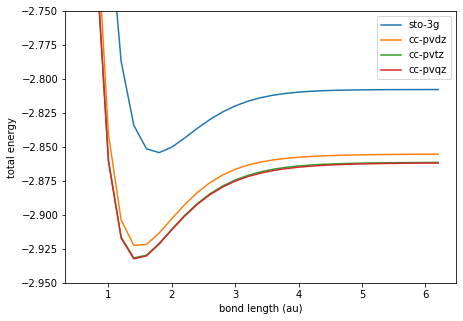

In [7]:
R,es,ed,et,eq = np.loadtxt("./pec.dat",unpack=True)
plt.figure(figsize=(7, 5))
plt.plot(R,es,label='sto-3g')
plt.plot(R,ed,label='cc-pvdz')
plt.plot(R,et,label='cc-pvtz')
plt.plot(R,eq,label='cc-pvqz')
plt.legend(loc='best')
plt.xlabel('bond length (au)')
plt.ylabel('total energy')
plt.ylim(-2.95,-2.75)